In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects
from mpl_toolkits.mplot3d import Axes3D

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import tensorflow

import os

import pandas as pd

Using TensorFlow backend.


In [2]:
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.metrics.pairwise import paired_distances
from sklearn.pipeline import Pipeline

In [3]:
data_path = os.path.join('pima-indians-diabetes.data.csv')
diabetes = pd.read_csv(data_path, names = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

diabetes_pd = pd.DataFrame()


diabetes.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
clean_diabetes = diabetes.dropna()

<IPython.core.display.Javascript object>


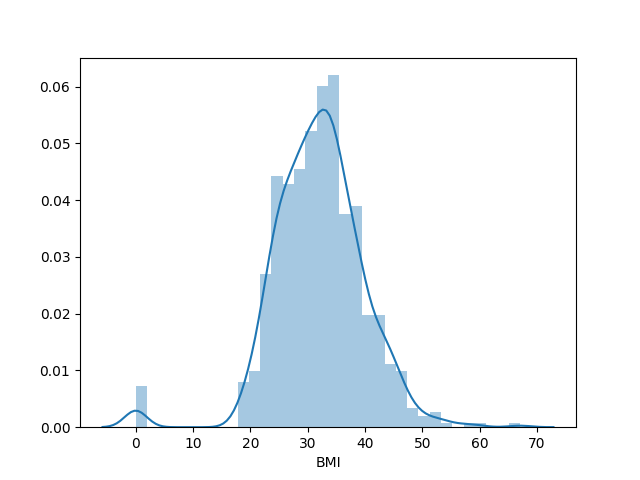

<IPython.core.display.Javascript object>


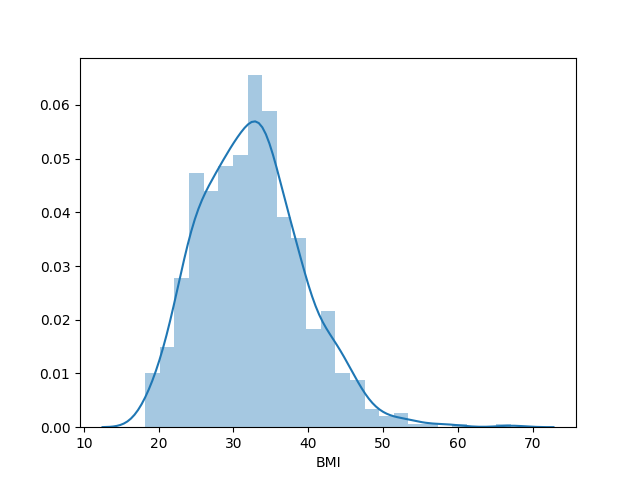

In [6]:
import seaborn as sns
#eliminating 0's from BMI
plt.figure()
sns.distplot(diabetes['BMI'])
diabetes = diabetes[diabetes['BMI']>10]
plt.figure()
sns.distplot(diabetes['BMI'])

<IPython.core.display.Javascript object>


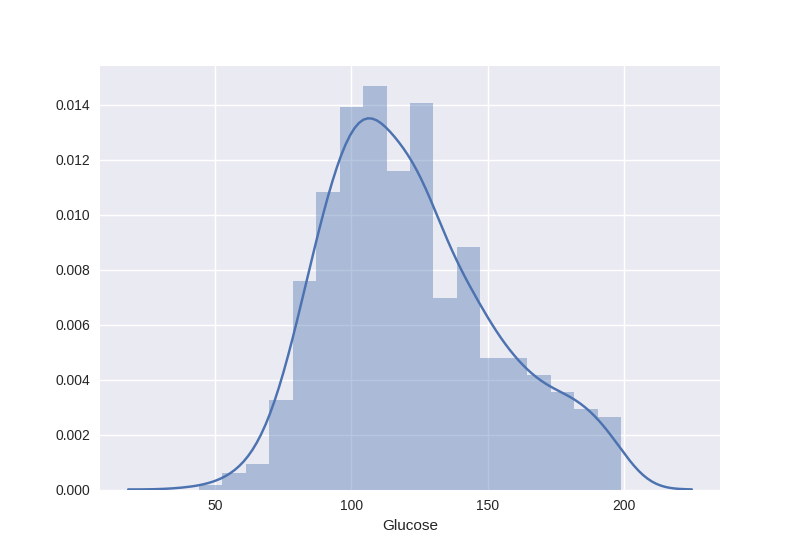

In [7]:
#eliminating 0's from BMI
diabetes = diabetes[diabetes['Glucose']>10]
plt.figure()
sns.distplot(diabetes['Glucose'])

<IPython.core.display.Javascript object>


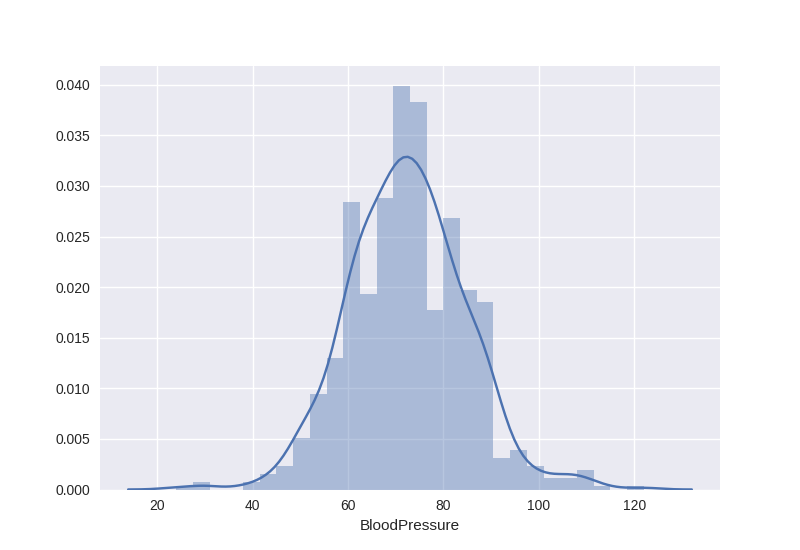

In [8]:
#eliminating 0's from BMI
diabetes = diabetes[diabetes['BloodPressure']>10]
plt.figure()
sns.distplot(diabetes['BloodPressure'])

<IPython.core.display.Javascript object>


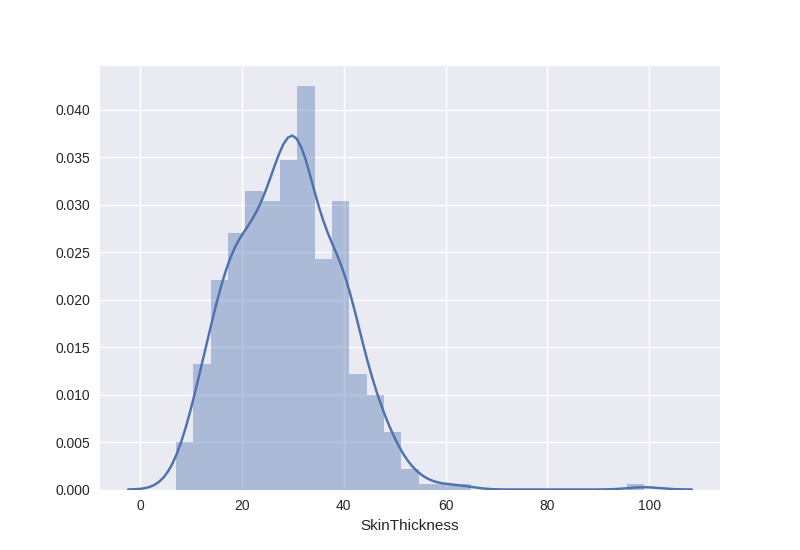

In [9]:
#eliminating 0's from BMI
diabetes = diabetes[diabetes['SkinThickness']>0]
plt.figure()
sns.distplot(diabetes['SkinThickness'])

<IPython.core.display.Javascript object>


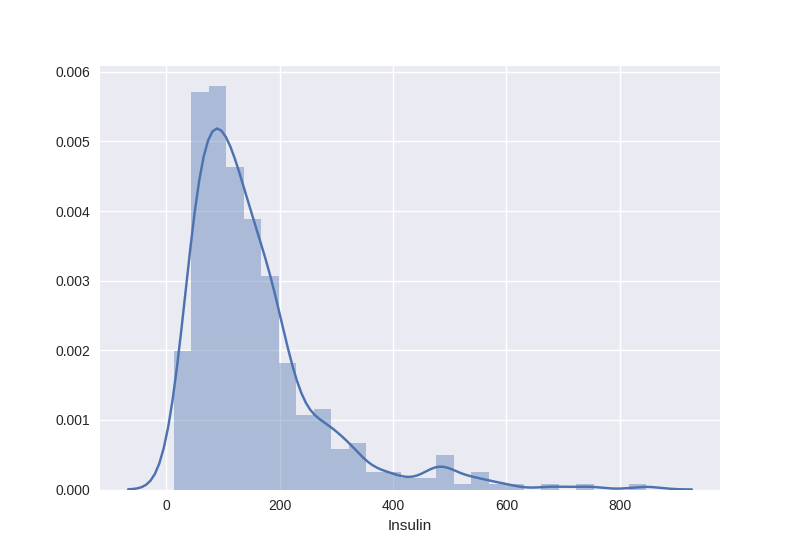

In [10]:
#eliminating 0's from BMI
diabetes = diabetes[diabetes['Insulin']>0]
plt.figure()
sns.distplot(diabetes['Insulin'])

In [11]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<IPython.core.display.Javascript object>


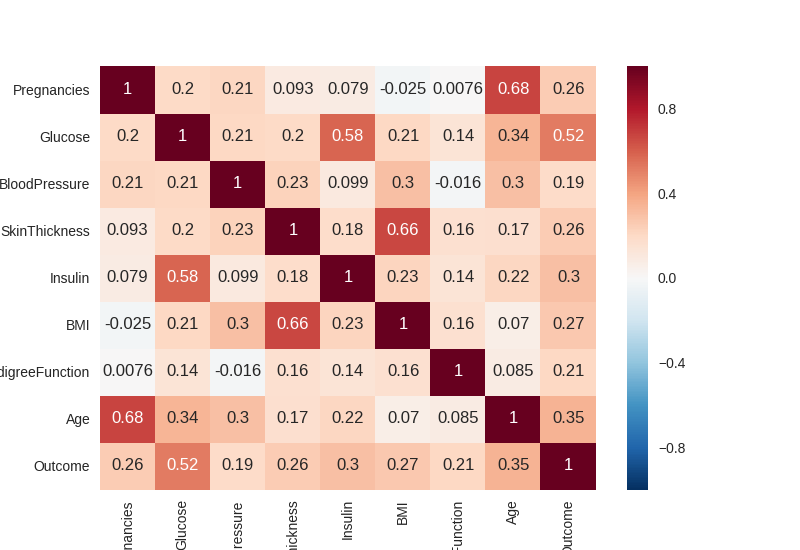

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text xticklabel objects>)

In [12]:
corr = diabetes.corr()
plt.figure()
diabetes.corr()
sns.heatmap(corr, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [13]:
#number of unique combinations
import scipy.special
print(scipy.special.binom(8, 2))

28.0


<IPython.core.display.Javascript object>


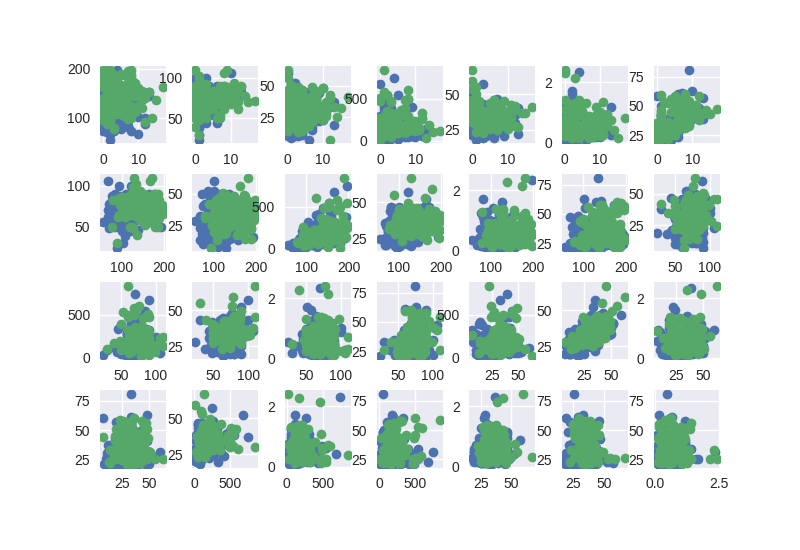

In [14]:
# format axes labels
# var_arr = [i.rstrip(' ') for i in iris_pd.columns[:4]]
# # create legend
# from matplotlib.lines import Line2D
# labels = ['Setosa', 'Versicolor', 'Virginica']
# legend_elements = [Line2D([0], [0], color='tab:blue', lw=4, label='Setosa'),
#                    Line2D([0], [0], color='tab:orange', lw=4, label='Versicolor'),
#                    Line2D([0], [0], color='tab:green', lw=4, label='Virginica'),]
# create figure; the numbers here are hard-coded based on the size of the data set
fig = plt.figure()
cnt = 1
for a in range(8):
    for b in range(a+1,8):
        ax = fig.add_subplot(4, 7, cnt)
        for i in range(2):
            # note the use of pandas to aid in the slicing of data
            tmp_data = diabetes[diabetes['Outcome'] == i]
            x_sub = tmp_data.drop(columns='Outcome')
            x_sub = x_sub.get_values()
            # you may also use ax.scatter; linestyle, marker args may change
            ax.plot(x_sub[:,a], x_sub[:,b], linestyle='', marker='o')
#             ax.set_xlabel(r"{}".format(var_arr[a]), fontsize=14)
#             ax.set_ylabel(r"{}".format(var_arr[b]), fontsize=14)
        cnt += 1
# adjust plot spacing
plt.subplots_adjust(bottom=0.15, wspace=0.4, hspace=0.4)
# add legend
# plt.figlegend(handles=legend_elements, labels=labels, loc='lower center',
#               ncol=3, bbox_to_anchor=(0.5, 0.0))

plt.show()

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(diabetes, np.array(diabetes['Outcome']), test_size = 40,
                                                      random_state=15)

x_train_labels = x_train["Outcome"].copy()
x_train = x_train.drop("Outcome", axis=1)

x_valid_labels = x_valid["Outcome"].copy()
x_valid = x_valid.drop("Outcome", axis=1)

from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(x_train)
train_set_scaled = scaler.transform(x_train)
test_set_scaled = scaler.transform(x_valid)

/home/harperes/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<IPython.core.display.Javascript object>


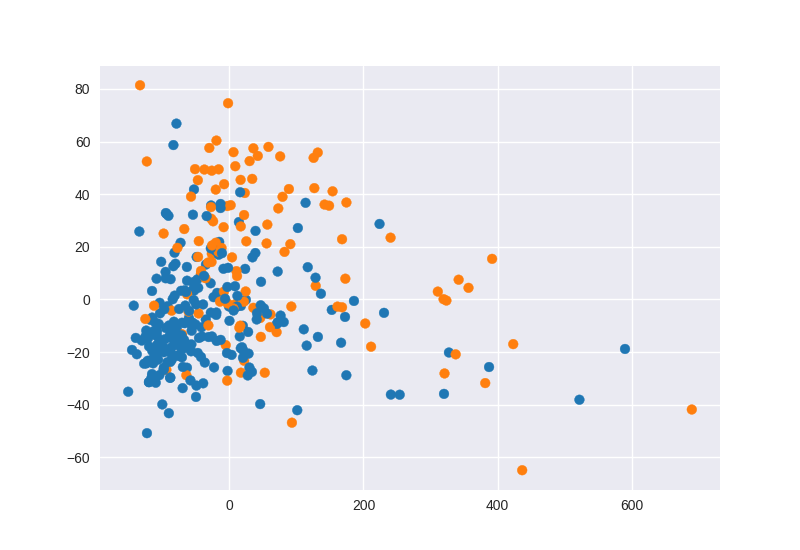

In [16]:
# take the input X data and reduce to 2 dimensions via PCA
model = PCA(n_components=2)
model.fit(x_train)
X_reduced = model.transform(x_train)
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=y_train, cmap='tab10', vmax=10)
# labels = ['Setosa', 'Versicolor', 'Virginica']
# legend_elements = [Line2D([0], [0], color='tab:blue', lw=4, label='Setosa'),
#                    Line2D([0], [0], color='tab:orange', lw=4, label='Versicolor'),
#                    Line2D([0], [0], color='tab:green', lw=4, label='Virginica'),]
# ax.legend(handles=legend_elements, labels=labels, loc='upper center',
#               ncol=3, bbox_to_anchor=(0.5, 1.1))
plt.show()

<IPython.core.display.Javascript object>


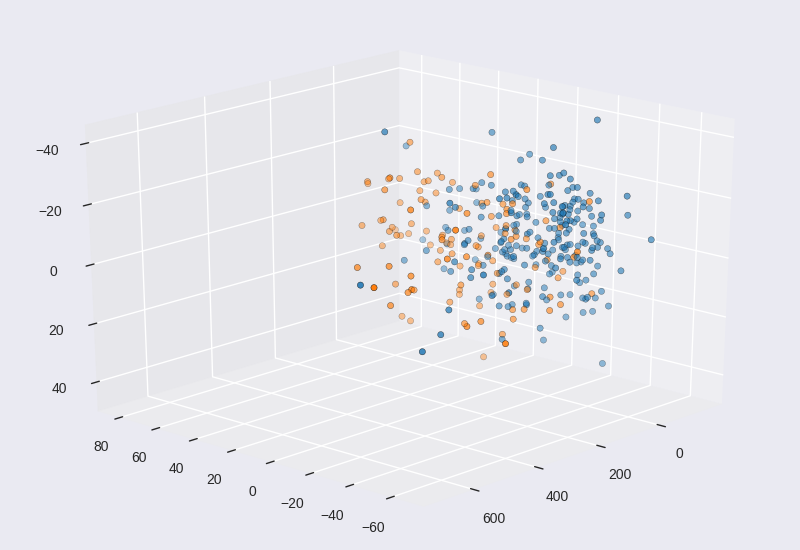

In [17]:
X_reduced = PCA(n_components=3).fit_transform(x_train)
fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2],
           c=y_train, edgecolor='k', cmap='tab10', vmax=10)
# labels = ['Setosa', 'Versicolor', 'Virginica']
# legend_elements = [Line2D([0], [0], color='tab:blue', lw=4, label='Setosa'),
#                    Line2D([0], [0], color='tab:orange', lw=4, label='Versicolor'),
#                    Line2D([0], [0], color='tab:green', lw=4, label='Virginica'),]
# ax.legend(handles=legend_elements, labels=labels, loc='upper center',
#               ncol=3)
plt.show()

In [20]:
model = TSNE(random_state=58, verbose=0, n_components=2, early_exaggeration=15,
             learning_rate=100, perplexity=50, n_iter=2000)
X_reduced = model.fit_transform(x_train)

<IPython.core.display.Javascript object>


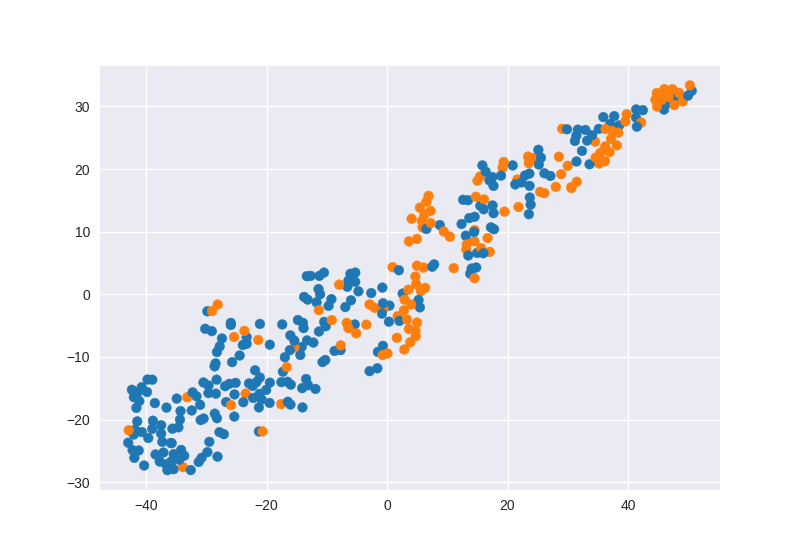

In [21]:
# take the input X data and reduce to 2 dimensions via PCA
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=y_train, cmap='tab10', vmax=10)
# labels = ['Setosa', 'Versicolor', 'Virginica']
# legend_elements = [Line2D([0], [0], color='tab:blue', lw=4, label='Setosa'),
#                    Line2D([0], [0], color='tab:orange', lw=4, label='Versicolor'),
#                    Line2D([0], [0], color='tab:green', lw=4, label='Virginica'),]
# ax.legend(handles=legend_elements, labels=labels, loc='upper center',
#               ncol=3, bbox_to_anchor=(0.5, 1.1))
plt.show()

(40,)


<IPython.core.display.Javascript object>


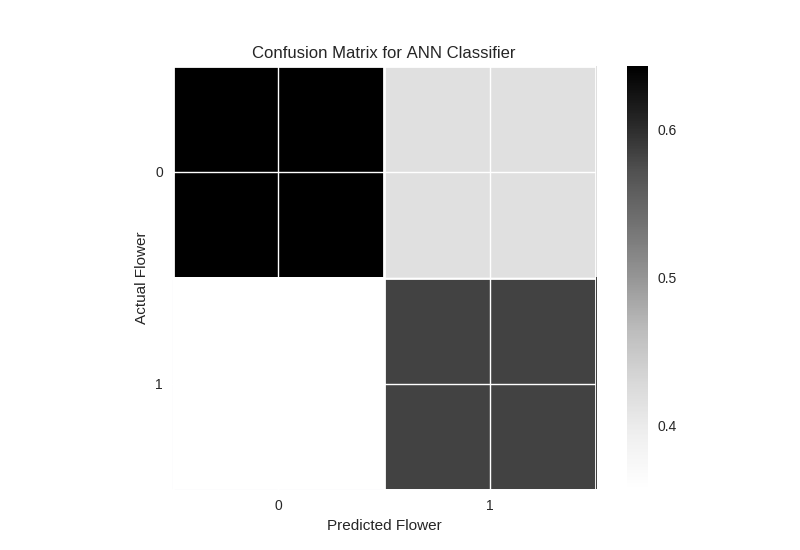

Classification report for classifier GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=23, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None):
              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.41      0.58      0.48        12

   micro avg       0.62      0.62      0.62        40
   macro avg       0.60      0.61      0.59        40
weighted avg       0.67      0.62      0.64        40


Confusion matrix:
[[18 10]
 [ 5  7]]


In [22]:
# we train on 3 classes
# feel free to change the covariance type and see how performance changes
model = GaussianMixture(n_components=2, covariance_type='full', init_params='kmeans',
                        # does not work
#                         random_state=42)
                        # works
                        random_state=23)
# init
#model.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(3)])
model.fit(x_train)
y_pred = model.predict(x_valid)
print(y_pred.shape)
cm = metrics.confusion_matrix(y_valid, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm = cm_norm.T

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm_norm, interpolation='nearest')

ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, 2, 1))
#ax.set_xticklabels(['Setosa', 'Versicolor', 'Virginica'])
#ax.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.set_xticks(np.arange(-0.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-0.5, 2, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

cbar = fig.colorbar(cax, ticks=[i for i in np.arange(0, 1, 0.1)])

ax.set_xlabel("Predicted Flower")
ax.set_ylabel("Actual Flower")
ax.set_title(r"Confusion Matrix for ANN Classifier")

plt.show()

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_valid, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_valid, y_pred))

<IPython.core.display.Javascript object>


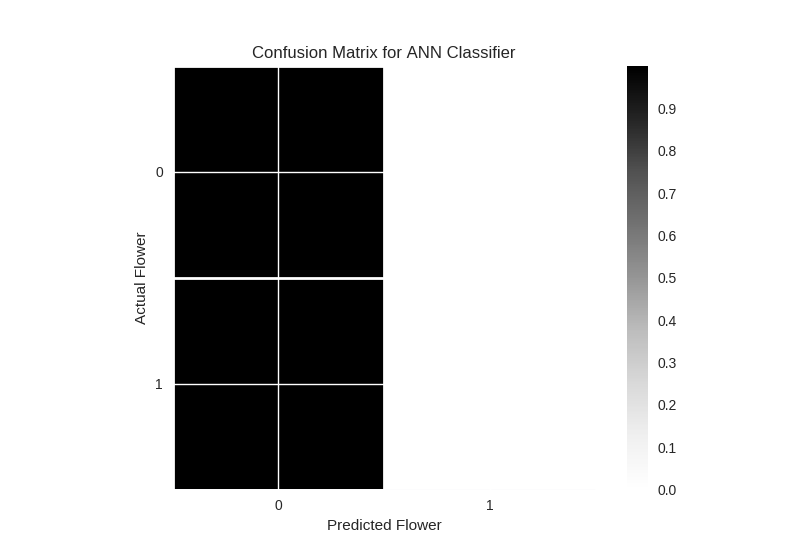

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        28
           1       0.00      0.00      0.00        12

   micro avg       0.70      0.70      0.70        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.49      0.70      0.58        40


Confusion matrix:
[[28  0]
 [12  0]]


/home/harperes/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/harperes/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/harperes/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# Create a classifier: a support vector classifier
model = svm.SVC(kernel='rbf', gamma=0.1)

# fit the data
model.fit(x_train, y_train)

# get the prediction, performance in a confusion matrix
y_pred = model.predict(x_valid)
cm = metrics.confusion_matrix(y_valid, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm = cm_norm

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm_norm, interpolation='nearest')

ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, 2, 1))
# ax.set_xticklabels(['Setosa', 'Versicolor', 'Virginica'])
# ax.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.set_xticks(np.arange(-0.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-0.5, 2, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

cbar = fig.colorbar(cax, ticks=[i for i in np.arange(0, 1, 0.1)])

ax.set_xlabel("Predicted Flower")
ax.set_ylabel("Actual Flower")
ax.set_title(r"Confusion Matrix for ANN Classifier")

plt.show()

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_valid, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_valid, y_pred))

In [ ]:
# x_train.shape
# print(x_train)
# #x_train=x_train.drop(columns = ['Outcome'])
# print(x_valid)
# x_valid=x_valid.drop(columns = ['Outcome'])

In [39]:
del model

In [47]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=8))
# model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
# model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                208       
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


In [48]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1)
# history = model.fit(x_train, np_utils.to_categorical(y_train), batch_size=40, epochs=1000,
#                     validation_split=0.2, shuffle=True, verbose=1, callbacks=[early_stop])
history = model.fit(x_train, y_train, batch_size=32, epochs=1000,
                    validation_split=0.2, shuffle=True, verbose=1, callbacks=[early_stop])

Train on 281 samples, validate on 71 samples
Epoch 1/1000
281/281 [==============================] - 0s 2ms/step - loss: 4.8119 - acc: 0.3416 - val_loss: 3.0373 - val_acc: 0.3099
Epoch 2/1000
281/281 [==============================] - 0s 144us/step - loss: 2.1224 - acc: 0.3808 - val_loss: 1.3984 - val_acc: 0.4648
Epoch 3/1000
281/281 [==============================] - 0s 123us/step - loss: 1.0845 - acc: 0.4769 - val_loss: 0.8386 - val_acc: 0.5211
Epoch 4/1000
281/281 [==============================] - 0s 134us/step - loss: 0.7612 - acc: 0.5623 - val_loss: 0.6995 - val_acc: 0.6338
Epoch 5/1000
281/281 [==============================] - 0s 142us/step - loss: 0.6909 - acc: 0.6477 - val_loss: 0.6867 - val_acc: 0.6901
Epoch 6/1000
281/281 [==============================] - 0s 128us/step - loss: 0.6875 - acc: 0.6584 - val_loss: 0.6860 - val_acc: 0.6901
Epoch 7/1000
281/281 [==============================] - 0s 152us/step - loss: 0.6869 - acc: 0.6584 - val_loss: 0.6853 - val_acc: 0.6901
Epoch

Epoch 120/1000
281/281 [==============================] - 0s 125us/step - loss: 0.6445 - acc: 0.6584 - val_loss: 0.6282 - val_acc: 0.6901
Epoch 121/1000
281/281 [==============================] - 0s 139us/step - loss: 0.6444 - acc: 0.6584 - val_loss: 0.6280 - val_acc: 0.6901
Epoch 122/1000
281/281 [==============================] - 0s 129us/step - loss: 0.6444 - acc: 0.6584 - val_loss: 0.6279 - val_acc: 0.6901
Epoch 123/1000
281/281 [==============================] - 0s 129us/step - loss: 0.6443 - acc: 0.6584 - val_loss: 0.6277 - val_acc: 0.6901
Epoch 124/1000
281/281 [==============================] - 0s 118us/step - loss: 0.6442 - acc: 0.6584 - val_loss: 0.6276 - val_acc: 0.6901
Epoch 125/1000
281/281 [==============================] - 0s 122us/step - loss: 0.6442 - acc: 0.6584 - val_loss: 0.6275 - val_acc: 0.6901
Epoch 126/1000
281/281 [==============================] - 0s 123us/step - loss: 0.6441 - acc: 0.6584 - val_loss: 0.6273 - val_acc: 0.6901
Epoch 127/1000
281/281 [==========

Epoch 179/1000
281/281 [==============================] - 0s 125us/step - loss: 0.6424 - acc: 0.6584 - val_loss: 0.6232 - val_acc: 0.6901
Epoch 180/1000
281/281 [==============================] - 0s 130us/step - loss: 0.6424 - acc: 0.6584 - val_loss: 0.6231 - val_acc: 0.6901
Epoch 181/1000
281/281 [==============================] - 0s 119us/step - loss: 0.6424 - acc: 0.6584 - val_loss: 0.6231 - val_acc: 0.6901
Epoch 182/1000
281/281 [==============================] - 0s 135us/step - loss: 0.6424 - acc: 0.6584 - val_loss: 0.6230 - val_acc: 0.6901
Epoch 183/1000
281/281 [==============================] - 0s 128us/step - loss: 0.6424 - acc: 0.6584 - val_loss: 0.6230 - val_acc: 0.6901
Epoch 184/1000
281/281 [==============================] - 0s 134us/step - loss: 0.6424 - acc: 0.6584 - val_loss: 0.6229 - val_acc: 0.6901
Epoch 185/1000
281/281 [==============================] - 0s 127us/step - loss: 0.6424 - acc: 0.6584 - val_loss: 0.6229 - val_acc: 0.6901
Epoch 186/1000
281/281 [==========

<IPython.core.display.Javascript object>


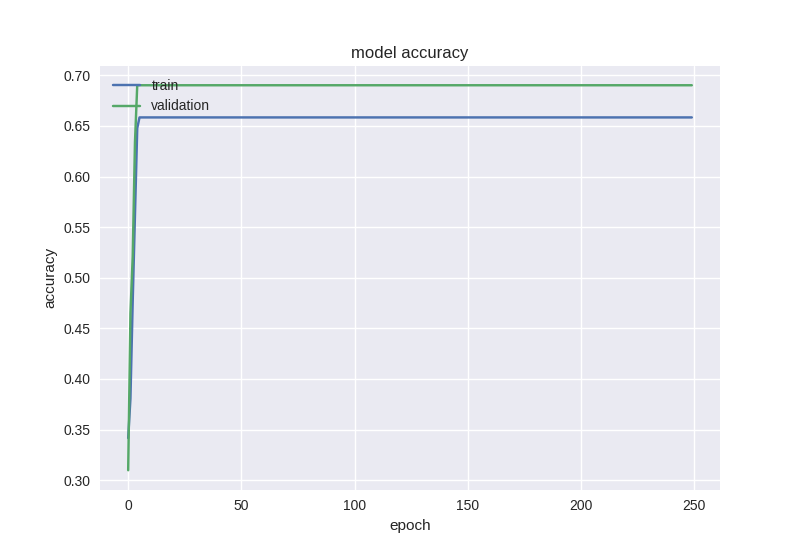

<IPython.core.display.Javascript object>


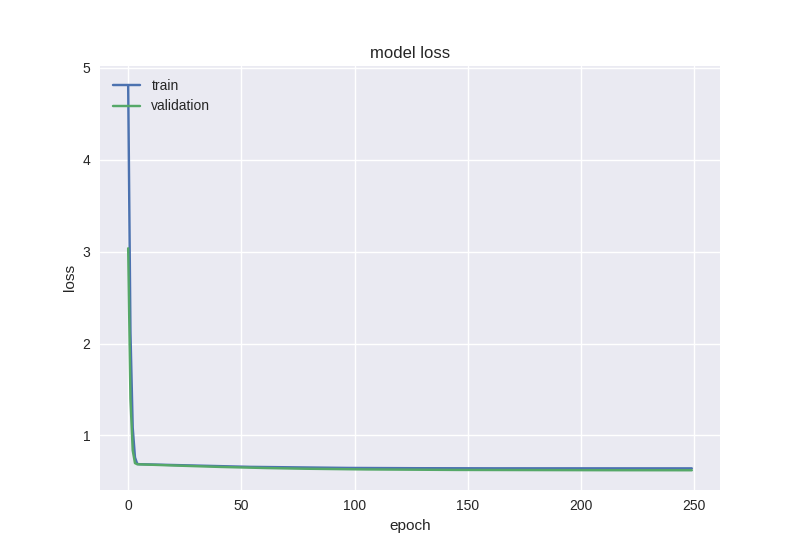

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_title('model accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('model loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'validation'], loc='upper left')
plt.show()

40/40 [==============================] - 0s 91us/step
[0.6153756976127625, 0.7]


<IPython.core.display.Javascript object>


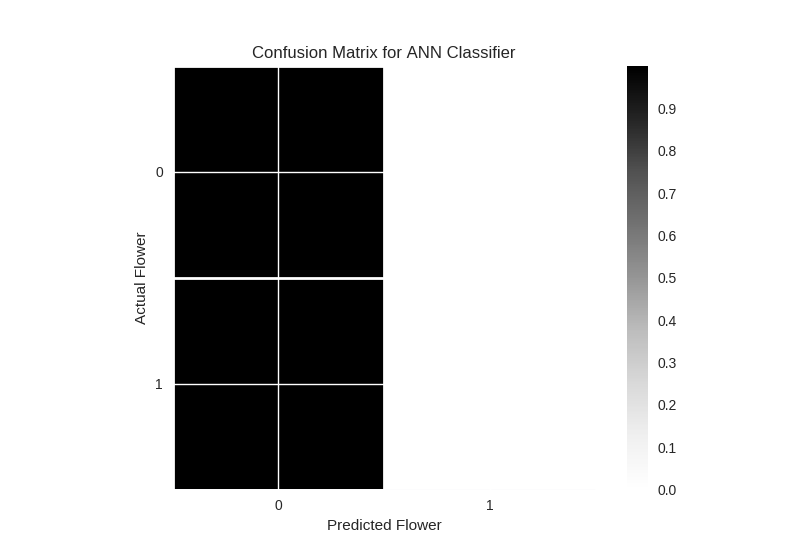

Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f6e9c0993c8>:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        28
           1       0.00      0.00      0.00        12

   micro avg       0.70      0.70      0.70        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.49      0.70      0.58        40


Confusion matrix:
[[28  0]
 [12  0]]


/home/harperes/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/harperes/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/harperes/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
y_pred = model.predict(x_valid)
# y_pred = y_pred.argmax(axis=1)
# print(y_pred)
y_pred = np.round(y_pred).reshape(-1).astype('int')
scores = model.evaluate(x_valid, y_valid)
print(scores)
cm = metrics.confusion_matrix(y_valid, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm = cm_norm

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm_norm, interpolation='nearest', vmin=0, vmax=1)

ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, 2, 1))
# ax.set_xticklabels(['Setosa', 'Versicolor', 'Virginica'])
# ax.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.set_xticks(np.arange(-0.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-0.5, 2, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

cbar = fig.colorbar(cax, ticks=[i for i in np.arange(0, 1, 0.1)])

ax.set_xlabel("Predicted Flower")
ax.set_ylabel("Actual Flower")
ax.set_title(r"Confusion Matrix for ANN Classifier")

plt.show()

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_valid, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_valid, y_pred))

In [ ]:
print(np.round(y_pred).reshape(-1).astype('int'))
print(y_valid)